In [7]:
import scipy.io
import pandas as pd
import numpy as np 
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score
import scipy.stats as stats
from mat_preproc import preproc

from joblib import Parallel, delayed
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")
plt.rcParams['figure.dpi'] = 140

# Encodings for Each Label

## *source information*

1. SC (Source Correct)
2. CR (Correct Rejection)
3. SI (Source Incorrect)
4. Miss 
5. FA  (False Alarm)

## *label for the source response*

1. RS (Remember Source)
2. RO (Remember Other)
3. F (Familiarity)
4. MN (Maybe New) 
5. SN (Sure New)


Two different 

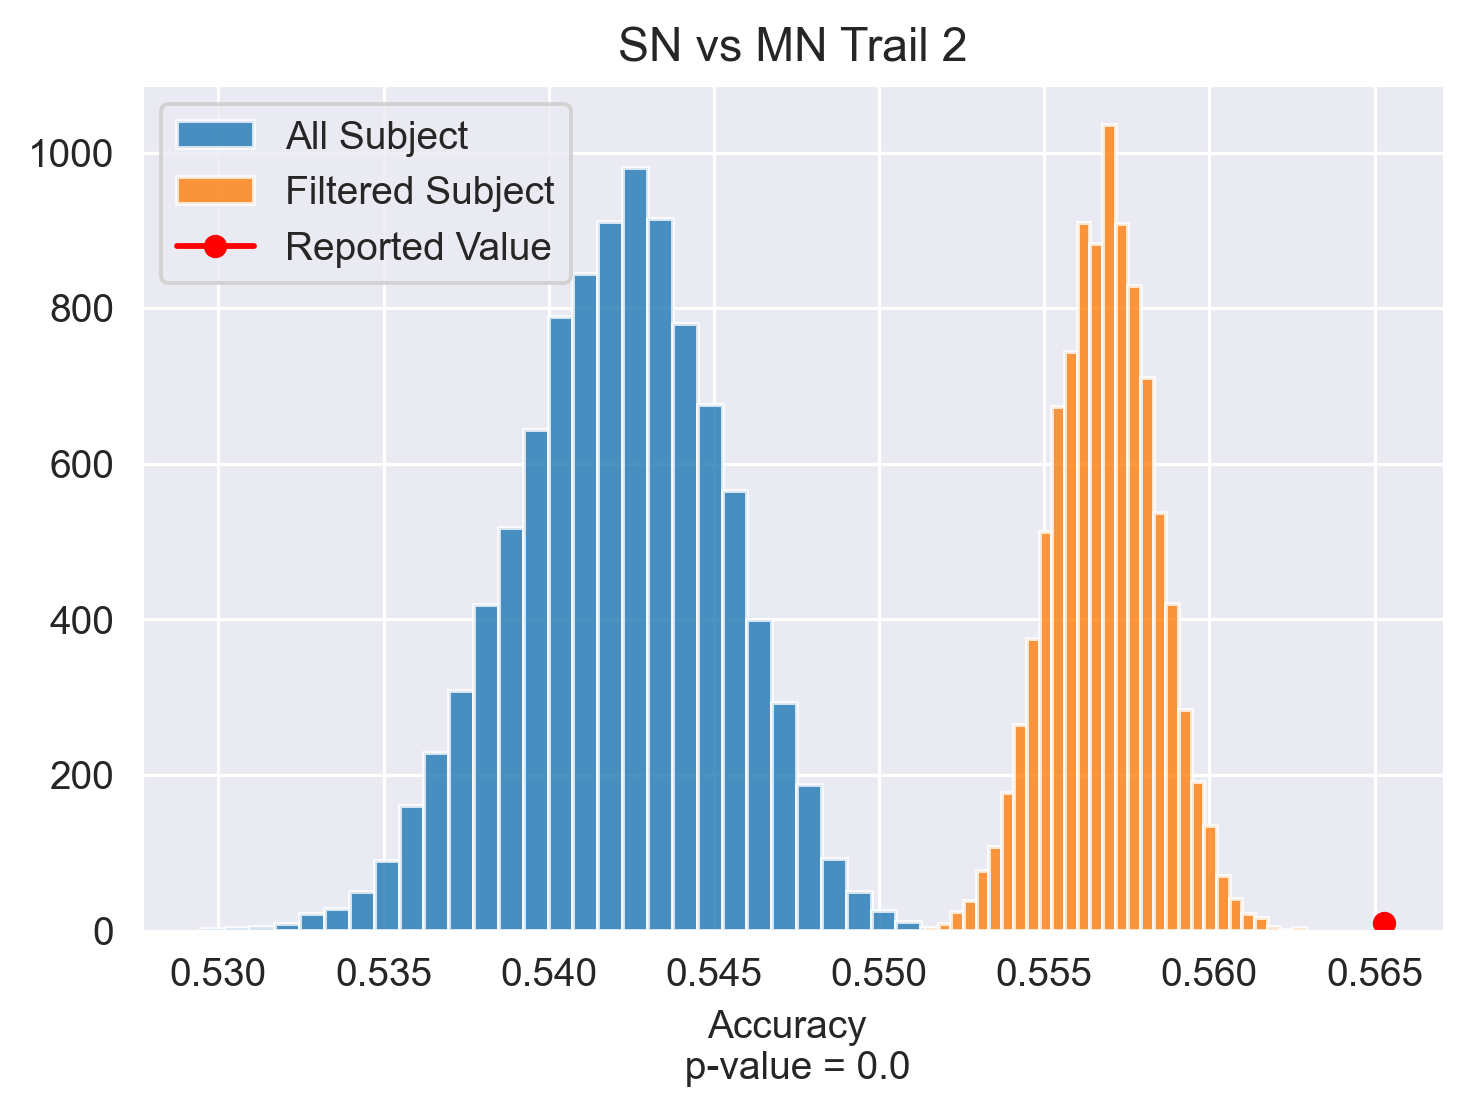

In [12]:
trial_num = 2

with open(f'data/SN_vs_MN_empirical_accs_{trial_num}.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="All Subject", bins=30, alpha=0.8)

with open(f'data/SN_vs_MN_empirical_accs_leftout_{trial_num}.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="Filtered Subject", bins=30, alpha=0.8)
plt.title(f"SN vs MN Trail {trial_num}")

reported_val = [0.5421, 0.5653][trial_num-1]

plt.plot(reported_val, 10, marker="o", markersize=5, c="red", label="Reported Value")
plt.xlabel(f"Accuracy \n p-value = {np.mean(np.array(data) > reported_val)}")
plt.legend()

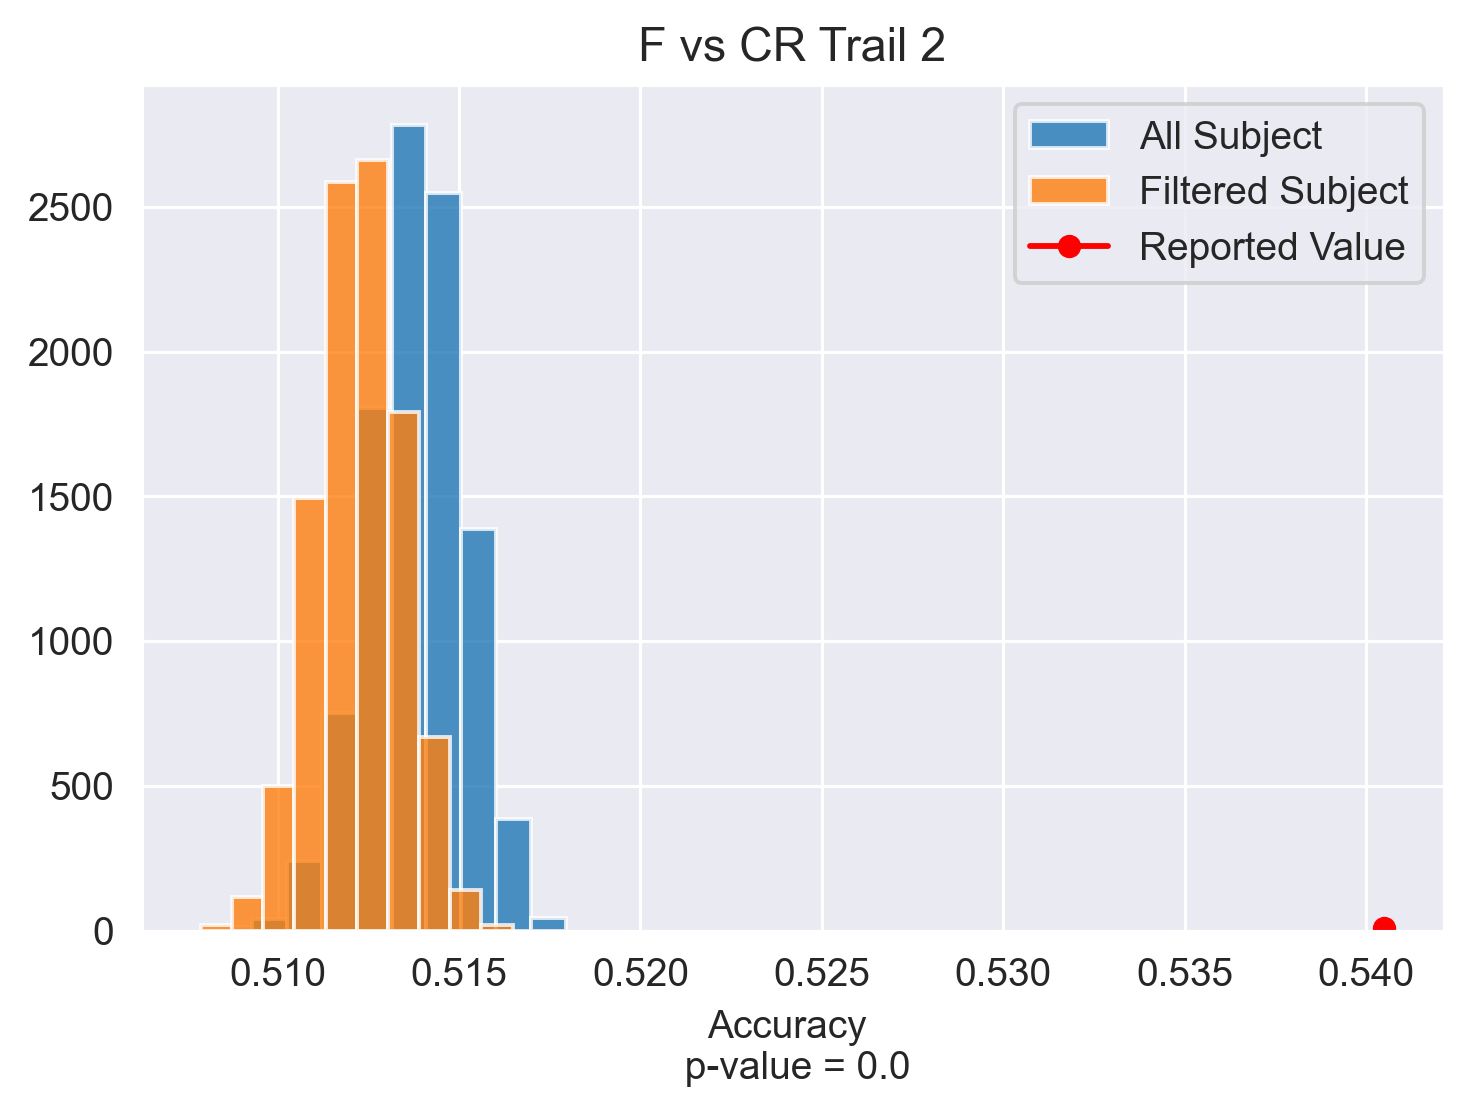

In [14]:
trial_num = 2

with open(f'data/F_vs_CR_empirical_accs_{trial_num}.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="All Subject", bins=10, alpha=0.8)

with open(f'data/F_vs_CR_empirical_accs_leftout_{trial_num}.pkl', 'rb') as f:
    data = pkl.load(f)
    
reported_val = [0.5465, 0.5405][trial_num-1]

plt.hist(data, label="Filtered Subject", bins=10, alpha=0.8)
plt.plot(reported_val, 10, marker="o", markersize=5, c="red", label="Reported Value")
plt.title(f"F vs CR Trail {trial_num}")
plt.xlabel(f"Accuracy \n p-value = {np.mean(np.array(data) > reported_val)}")
plt.legend()


In [ ]:
with open('data/F_vs_CR_empirical_accs_2.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="All Subject", bins=10 , alpha=0.8)
plt.title("F vs CR Trail 2")

with open('data/F_vs_CR_empirical_accs_leftout_2.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="Filtered Subject", bins=10 , alpha=0.8)
plt.title("F vs CR Trail 2")
plt.plot(0.5405, 10, marker="o", markersize=5, c="red", label="Reported Value")
plt.legend()

plt.legend()
print(f"p value = {np.mean(np.array(data) > 0.5405)}")

 Entire dataset on the simpliest setting using sklearn and matlab.

# BootStrap

In [ ]:
with open('SN_vs_MN_empirical_accs_leftout_1.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="Without Replacement", alpha=0.8)
plt.title("SN vs MN Trail 1")
plt.legend()
print(f"p value = {np.mean(np.array(data) > 0.5421)}")

with open('SN_vs_MN_empirical_accs_leftout_boot_1.pkl', 'rb') as f:
    data = pkl.load(f)
plt.hist(data, label="With Replacement", alpha=0.8)
plt.title("SN vs MN Trail 1 Filtered Subject")

plt.plot(0.5421, 10, marker="o", markersize=5, c="red", label="Reported Value")
plt.legend()
print(f"p value = {np.mean(np.array(data) > 0.5421)}")